In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
!pip install anai-opensource

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.

In [ ]:
import anai
from anai.preprocessing import Preprocessor

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:   tcp://172.28.0.12:36653
INFO:distributed.scheduler:  dashboard at:  http://172.28.0.12:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://172.28.0.12:34893'
INFO:distributed.nanny:        Start Nanny at: 'tcp://172.28.0.12:45839'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://172.28.0.12:46127', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://172.28.0.12:46127
INFO:distributed.core:Starting established connection to tcp://172.28.0.12:33234
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://172.28.0.12:46715', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Star

In [ ]:
telemetry = pd.read_csv('/content/PdM_telemetry (1).csv')
errors = pd.read_csv('/content/PdM_errors.csv')
maint = pd.read_csv('/content/PdM_maint.csv')
failures = pd.read_csv('/content/PdM_failures.csv')
machines = pd.read_csv('/content/PdM_machines.csv')

In [ ]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [ ]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [ ]:
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [ ]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [ ]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


#EDA ON TELEMETRY DATA

In [ ]:
telemetry['datetime'] = pd.to_datetime(
    telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))

telemetry.describe()

Total number of telemetry records: 876100


,datetime,machineID,volt,rotate,pressure,vibration
count,876100,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,2015-07-02 18:00:00,50.500000,170.777736,446.605119,100.858668,40.385007
min,2015-01-01 06:00:00,1.000000,97.333604,138.432075,51.237106,14.877054
25%,2015-04-02 12:00:00,25.750000,160.304927,412.305714,93.498181,36.777299
50%,2015-07-02 18:00:00,50.500000,170.607338,447.558150,100.425559,40.237247
75%,2015-10-02 00:00:00,75.250000,181.004493,482.176600,107.555231,43.784938
max,2016-01-01 06:00:00,100.000000,255.124717,695.020984,185.951998,76.791072
std,NaN,28.866087,15.509114,52.673886,11.048679,5.370361


In [ ]:
plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'volt']]

In [ ]:
fig = px.line(x=plot_df['datetime'].values, y=plot_df['volt'].values, title='Voltage over time', template='plotly_dark')
fig.update_layout(xaxis_title='Time', yaxis_title='Voltage')
fig.show()

#EDA on Errors Data

In [ ]:
errors['datetime'] = pd.to_datetime(errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('object')

print("Total number of error records: %d" % len(errors.index))
errors.head()

Total number of error records: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [ ]:
fig = px.bar(x=errors['errorID'].values,
             title='Count of Errors', template='plotly_dark', color=errors['errorID'].values)
fig.update_layout(xaxis_title='Error Type', yaxis_title='Count')
fig.show()

#EDA on Maintainence Data


In [ ]:
maint["datetime"] = pd.to_datetime(maint['datetime'],format="%Y-%m-%d %H:%M:%S")
maint['comp'] = maint['comp'].astype('object')

print("Total number of maintenance records: %d" % len(maint.index))
maint.head()

Total number of maintenance records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [ ]:
fig = px.bar(x=maint['comp'].values, title = 'Count of comp', template = 'plotly_dark' , color = maint['comp'].values)
fig.update_layout(xaxis_title = 'Comp', yaxis_title = 'Count')
fig.show()

In [ ]:
machines['model'] = machines['model'].astype('object')

print("Total number of machines: %d" % len(machines.index))
machines.head()

Total number of machines: 100


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=machines.loc[machines['model'] == 'model1', 'age'], name='model1'))
fig.add_trace(go.Histogram(
    x=machines.loc[machines['model'] == 'model2', 'age'], name='model2'))
fig.add_trace(go.Histogram(
    x=machines.loc[machines['model'] == 'model3', 'age'], name='model3'))
fig.add_trace(go.Histogram(
    x=machines.loc[machines['model'] == 'model4', 'age'], name='model4',))
fig.update_layout(xaxis_title='Age', yaxis_title='Count', template='plotly_dark')
fig.update_layout(barmode='stack', title='Machine Age Distribution')
fig.show()

#EDA on Failure Data

In [ ]:
failures['datetime'] = pd.to_datetime(
    failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('object')

print("Total number of failures: %d" % len(failures.index))
failures.head()

Total number of failures: 761


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [ ]:
fig = px.bar(x=failures['failure'].values, title='Count of Failures', template='plotly_dark', color=failures['failure'].values)
fig.update_layout(xaxis_title='Failure Type', yaxis_title='Count')
fig.show()

#Feature Engineering

#Identifying Lag Features from Telemetry Data on a window of 24 hours

In [ ]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').mean().unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)


temp = []

for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').std().unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [ ]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                                               index='datetime',
                                               columns='machineID',
                                               values=col).resample('3H',closed='left',
                                                                                label='right',
                                                                                ).first().unstack().rolling(window=24, center=False).mean())
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                                              index='datetime',
                                              columns='machineID',
                                              values=col).resample('3H',
                                                                               closed='left',
                                                                               label='right',
                                                                               ).first().unstack().rolling(window=24, center=False).std())
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltsd_24h'].isnull()]

telemetry_mean_24h.head(10)

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
23,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022
24,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324
25,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216
26,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232
27,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570
28,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929
29,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369
30,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982
31,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346
32,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655


In [ ]:
telemetry_feat = pd.concat([telemetry_mean_3h,
                            telemetry_sd_3h.iloc[:, 2:6],
                            telemetry_mean_24h.iloc[:, 2:6],
                            telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()
telemetry_feat.describe()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291977.000000,291977,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000
mean,50.503899,2015-07-02 19:50:32.314188800,170.777344,446.605536,100.858665,40.384696,13.299177,44.456698,8.885976,4.441105,170.738342,446.622451,100.871860,40.382356,15.055923,50.680485,10.330242,5.103534
min,1.000000,2015-01-01 09:00:00,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,156.713608,310.118604,91.162625,35.800869,6.178154,18.363177,4.275651,2.108104
25%,26.000000,2015-04-02 15:00:00,164.449518,427.559989,96.238713,38.147732,8.027807,26.903727,5.370694,2.684653,168.100594,440.859663,98.730139,39.379127,13.409911,44.992826,8.984156,4.488631
50%,51.000000,2015-07-02 21:00:00,170.434250,448.382424,100.234309,40.145805,12.495649,41.794255,8.346061,4.173937,170.285725,448.772454,100.195972,40.107229,14.942428,50.156537,10.009680,5.008386
75%,76.000000,2015-10-02 03:00:00,176.612207,468.448273,104.406729,42.227512,17.688547,59.105539,11.790367,5.899868,172.609273,456.129192,101.780484,40.908734,16.556760,55.657662,11.199380,5.589524
max,100.000000,2016-01-01 06:00:00,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,206.333895,491.081522,138.291979,55.266429,30.806053,117.198342,30.665847,12.757609
std,28.863913,NaN,9.501061,33.130486,7.414592,3.478391,6.966005,23.217195,4.656154,2.320281,4.178951,15.686284,3.983127,1.764322,2.383652,8.368899,2.129642,0.921640


In [ ]:
telemetry_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
23,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,171.536044,456.036706,101.652072,44.017022,13.716658,41.767447,11.754808,6.878286
24,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,171.069056,457.285237,101.011726,44.148324,13.741098,41.038218,11.521602,6.929500
25,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,170.859615,461.116153,101.172241,44.672216,13.915181,33.879652,11.667258,7.162152
26,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,171.566669,457.893518,100.708151,44.993232,13.583969,33.790685,11.447426,7.244618
27,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,171.536866,457.672110,99.826551,45.160570,13.590129,33.787875,11.919716,7.167877


#Identifying Lag Features from Error Data on a window of 24 hours

In [ ]:
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()

In [ ]:
error_count.head()

,datetime,machineID,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5
0,2015-01-03 07:00:00,1,True,False,False,False,False
1,2015-01-03 20:00:00,1,False,False,True,False,False
2,2015-01-04 06:00:00,1,False,False,False,False,True
3,2015-01-10 15:00:00,1,False,False,False,True,False
4,2015-01-22 10:00:00,1,False,False,False,True,False


In [ ]:
error_count.columns = ['datetime', 'machineID',
                       'error1', 'error2', 'error3', 'error4', 'error5']

In [ ]:
error_count.head(13)

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,True,False,False,False,False
1,2015-01-03 20:00:00,1,False,False,True,False,False
2,2015-01-04 06:00:00,1,False,False,False,False,True
3,2015-01-10 15:00:00,1,False,False,False,True,False
4,2015-01-22 10:00:00,1,False,False,False,True,False
5,2015-01-25 15:00:00,1,False,False,False,True,False
6,2015-01-27 04:00:00,1,True,False,False,False,False
7,2015-03-03 22:00:00,1,False,True,False,False,False
8,2015-03-05 06:00:00,1,True,False,False,False,False
9,2015-03-20 18:00:00,1,True,False,False,False,False


In [ ]:
error_count = telemetry[['datetime', 'machineID']].merge(
    error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
error_count.describe()

,datetime,machineID
count,876403,876403.000000
mean,2015-07-02 18:00:05.931517952,50.499881
min,2015-01-01 06:00:00,1.000000
25%,2015-04-02 12:00:00,25.000000
50%,2015-07-02 18:00:00,50.000000
75%,2015-10-02 00:00:00,76.000000
max,2016-01-01 06:00:00,100.000000
std,NaN,28.866464


In [ ]:
temp = []
fields = ['error%d' % i for i in range(1, 6)]
for col in fields:
    temp.append(pd.pivot_table(error_count,
                                              index='datetime',
                                              columns='machineID',
                                              values=col).resample('3H',
                                                                               closed='left',
                                                                               label='right',
                                                                               ).first().unstack().rolling(window=24, center=False).sum())
error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.describe()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
count,292077.000000,292077,292077.000000,292077.000000,292077.000000,292077.000000,292077.000000
mean,50.503898,2015-07-02 21:20:32.317505280,0.037483,0.029266,0.025117,0.025541,0.018666
min,1.000000,2015-01-01 09:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,2015-04-02 15:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,2015-07-02 21:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76.000000,2015-10-02 03:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,2016-01-01 09:00:00,2.000000,2.000000,1.500000,3.000000,2.000000
std,28.863914,NaN,0.192195,0.154875,0.140627,0.158549,0.134294


In [ ]:
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
23,1,2015-01-04 06:00:00,0.0,0.0,0.0,0.0,0.0
24,1,2015-01-04 09:00:00,0.0,0.0,0.0,0.0,1.0
25,1,2015-01-04 12:00:00,0.0,0.0,0.0,0.0,1.0
26,1,2015-01-04 15:00:00,0.0,0.0,0.0,0.0,1.0
27,1,2015-01-04 18:00:00,0.0,0.0,0.0,0.0,1.0


#Identifying Days Since Last Replacement using Maintainence on a window of 24 hours

In [ ]:
import numpy as np

comp_rep = pd.get_dummies(maint.set_index('datetime')).reset_index()
comp_rep.columns = ['datetime', 'machineID',
                    'comp1', 'comp2', 'comp3', 'comp4']

comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep,
                                                      on=['datetime',
                                                          'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

In [ ]:
components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(),
                 comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')

comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

In [ ]:
for comp in components:
    comp_rep[comp] = (comp_rep["datetime"] - pd.to_datetime(comp_rep[comp])) / np.timedelta64(1, "D")

comp_rep.describe()

,datetime,machineID,comp1,comp2,comp3,comp4
count,876823,876823.000000,876823.000000,876823.000000,876823.000000,876823.000000
mean,2015-07-02 18:04:36.939815424,50.499106,53.517611,51.537350,52.722043,53.826833
min,2015-01-01 06:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-02 12:00:00,25.000000,13.291667,12.125000,13.125000,13.000000
50%,2015-07-02 18:00:00,50.000000,32.791667,29.666667,32.250000,32.500000
75%,2015-10-02 00:00:00,75.000000,68.708333,66.541667,67.333333,70.458333
max,2016-01-01 06:00:00,100.000000,491.958333,348.958333,370.958333,394.958333
std,NaN,28.866046,62.490219,59.271457,58.875826,59.704062


In [ ]:
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
400,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
502,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
602,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
702,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
802,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667


#Machine Features: Descriptive Statistics about the Machine

In [ ]:
final_feat = telemetry_feat.merge(
    error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(
    comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

final_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18


In [ ]:
final_feat.describe()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,292698.000000,292698,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,...,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000
mean,50.501268,2015-07-02 20:05:53.336203520,170.784219,446.575340,100.864117,40.386506,13.300159,44.453806,8.886790,4.441220,...,0.037758,0.029442,0.025289,0.025712,0.018841,53.444887,51.452085,52.640758,53.737431,11.329497
min,1.000000,2015-01-01 09:00:00,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,2015-04-02 15:00:00,164.452628,427.534759,96.239740,38.147926,8.027559,26.903316,5.370347,2.684286,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.125000,13.125000,13.000000,7.000000
50%,50.000000,2015-07-02 21:00:00,170.436600,448.367055,100.236344,40.146085,12.496284,41.792210,8.347255,4.173691,...,0.000000,0.000000,0.000000,0.000000,0.000000,32.750000,29.625000,32.125000,32.375000,12.000000
75%,75.000000,2015-10-02 03:00:00,176.619220,468.434339,104.409335,42.228807,17.690501,59.099500,11.791536,5.900380,...,0.000000,0.000000,0.000000,0.000000,0.000000,68.625000,66.375000,67.250000,70.375000,16.000000
max,100.000000,2016-01-01 06:00:00,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,...,2.000000,2.000000,1.500000,3.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000
std,28.863879,NaN,9.509413,33.161392,7.423015,3.481097,6.967073,23.216722,4.656677,2.320464,...,0.192877,0.155121,0.140891,0.159066,0.134849,62.477055,59.241774,58.860338,59.673951,5.827516


#Constructung Labels

In [ ]:
labeled_features = final_feat.merge(
    failures, on=['datetime', 'machineID'], how='left')
labeled_features = labeled_features.fillna(
    method='bfill', limit=7)
labeled_features = labeled_features.fillna('none')
labeled_features.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18,none
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,comp4
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,comp4
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,comp4
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,comp4


In [ ]:
labeled_features.loc[labeled_features['failure'] == 'comp4'][:16]

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,comp4
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,comp4
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,comp4
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,comp4
5,1,2015-01-04 21:00:00,190.325814,422.692565,107.393234,49.552856,8.390777,7.176553,4.262645,7.598552,...,0.0,0.0,1.0,22.625,217.625,157.625,172.625,model3,18,comp4
6,1,2015-01-05 00:00:00,169.985134,458.929418,91.494362,54.882021,9.451483,12.052752,3.685906,6.621183,...,0.0,0.0,1.0,22.750,217.750,157.750,172.750,model3,18,comp4
7,1,2015-01-05 03:00:00,149.082619,412.180336,93.509785,54.386079,19.075952,30.715081,3.090266,6.530610,...,0.0,0.0,1.0,22.875,217.875,157.875,172.875,model3,18,comp4
8,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,...,0.0,0.0,1.0,23.000,218.000,158.000,0.000,model3,18,comp4
9,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,...,0.0,0.0,1.0,0.000,218.000,158.000,0.000,model3,18,comp4
1325,1,2015-06-18 09:00:00,169.324639,453.923471,101.313249,53.092274,28.155693,42.557599,7.688674,2.488851,...,0.0,0.0,1.0,89.125,29.125,14.125,134.125,model3,18,comp4


#Modelling

In [ ]:
threshold_dates = [[pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
                   [pd.to_datetime('2015-08-31 01:00:00'),
                    pd.to_datetime('2015-09-01 01:00:00')],
                   [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]]

test_results = []
anai_models = []
train_dfs = []
for last_train_date, first_test_date in threshold_dates:
    print('Training on %s to %s' % (last_train_date, first_test_date))
    train_y = labeled_features.loc[labeled_features['datetime']
                                   < last_train_date, 'failure']
    train_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] < last_train_date].drop(['datetime', 'machineID', 'failure'],axis= 1))
    df = pd.concat([train_X, train_y], axis=1)
    train_dfs.append(df)

Training on 2015-07-31 01:00:00 to 2015-08-01 01:00:00
Training on 2015-08-31 01:00:00 to 2015-09-01 01:00:00
Training on 2015-09-30 01:00:00 to 2015-10-01 01:00:00


#Modelling on 1s Threshold

In [54]:
ai1 = anai.run(target = 'failure', df = train_dfs[0], predictor = ['xgb','rfc'], ensemble = False)

Task: Classification 


░█████╗░███╗░░██╗░█████╗░██╗
██╔══██╗████╗░██║██╔══██╗██║
███████║██╔██╗██║███████║██║
██╔══██║██║╚████║██╔══██║██║
██║░░██║██║░╚███║██║░░██║██║
╚═╝░░╚═╝╚═╝░░╚══╝╚═╝░░╚═╝╚═╝
 

Started ANAI [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training ANAI [*]

Training Done [ ✓ ]

Results Below



,Name,Accuracy,Cross Validated Accuracy
0,Random Forest Classifier,99.890558,99.860238
1,XGBoost Classifier,99.825485,99.836575



Completed ANAI Run [ ✓ ]

Saved Best Model at ('anai_info/best/classifier/models/Random_Forest_Classifier_1731322232.pkl', 'anai_info/best/classifier/scalers/Random_Forest_Classifier_Scaler_1731322232.pkl')  

Time Elapsed :  1132.01 seconds 



#Explanations

Explaining Best ANAI model [*]



INFO:distributed.core:Event loop was unresponsive in Scheduler for 6363.56s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


Automatically switching to Surrogate mode



INFO:distributed.core:Event loop was unresponsive in Scheduler for 15.07s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


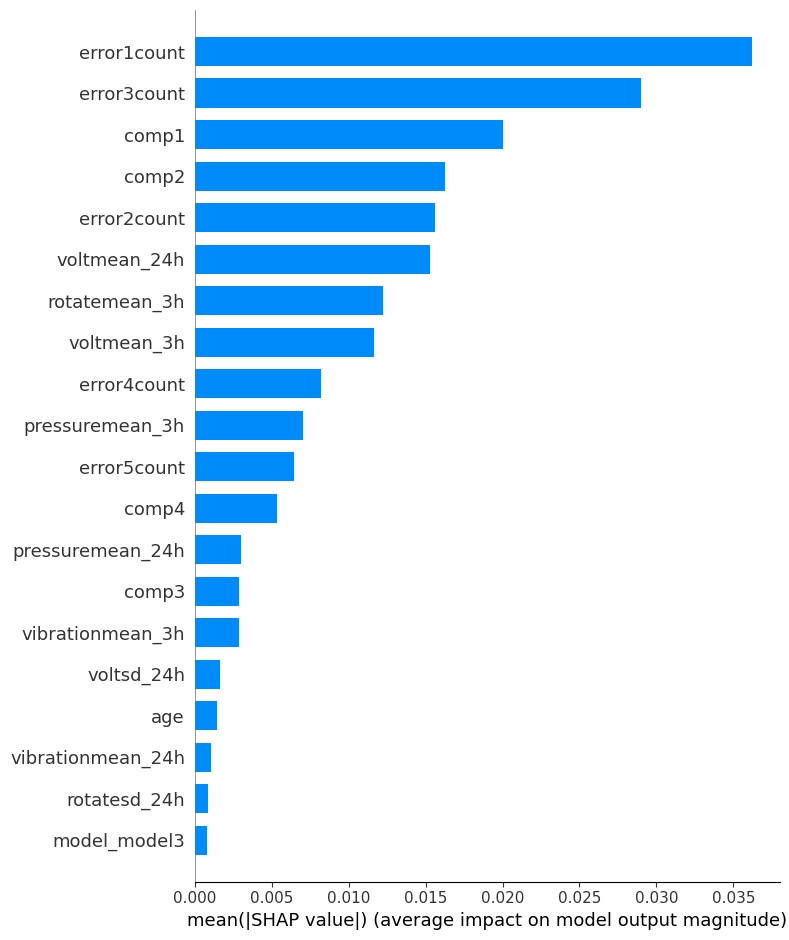

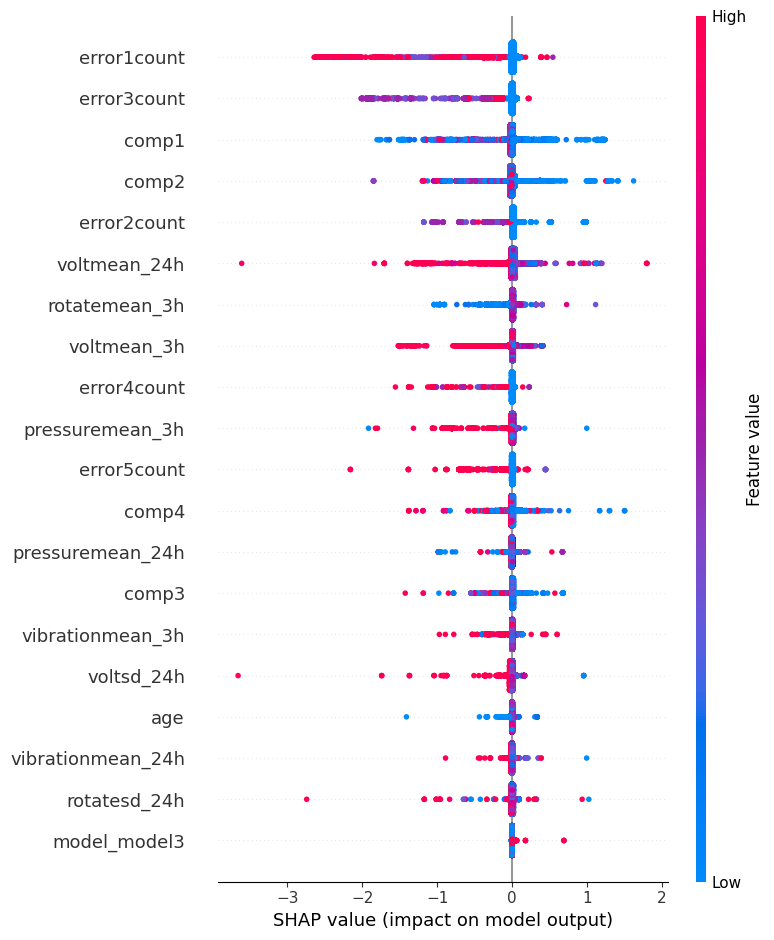

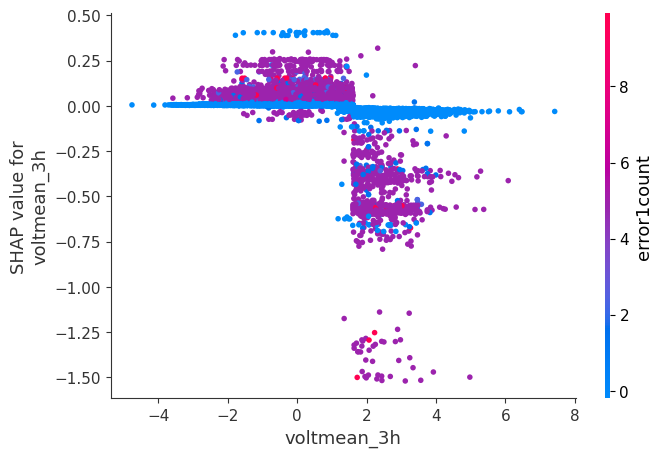

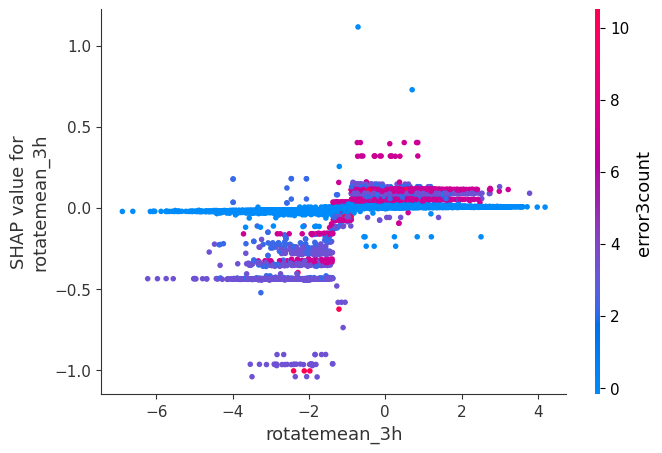

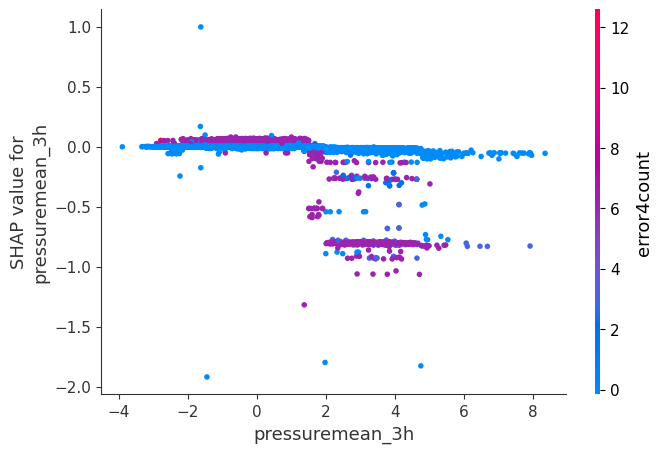

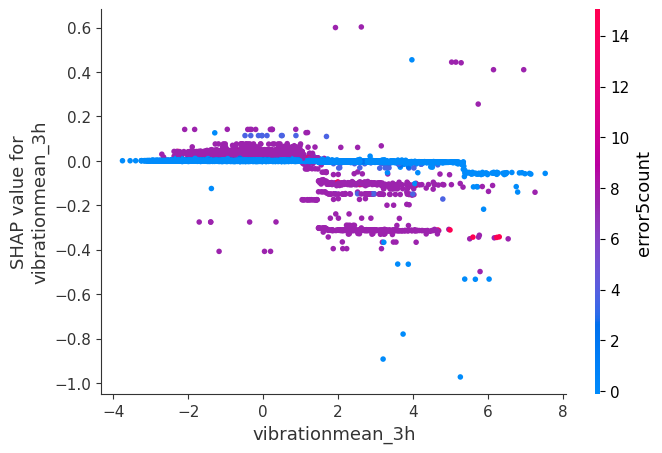

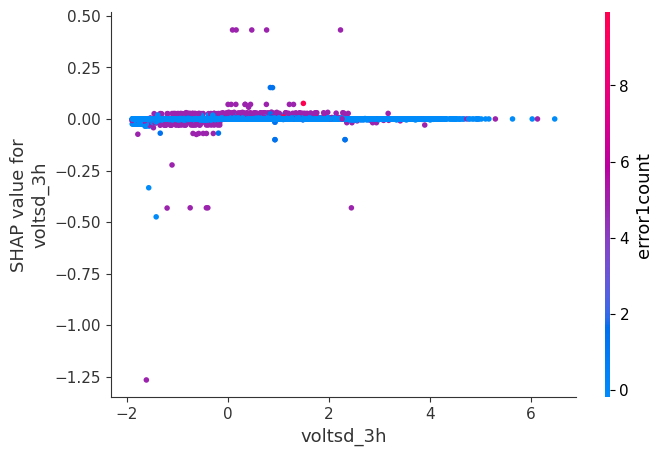

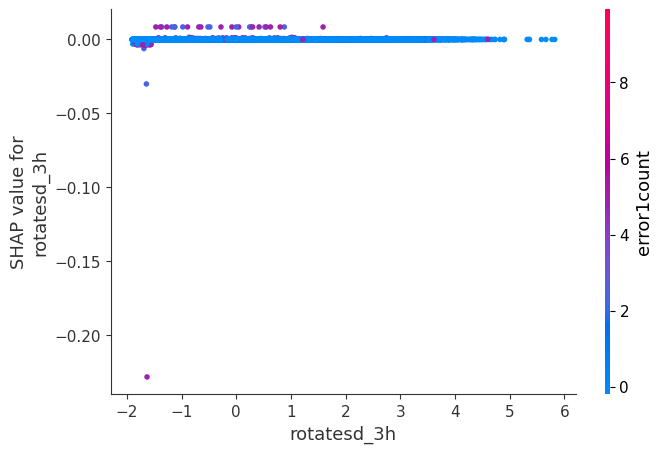

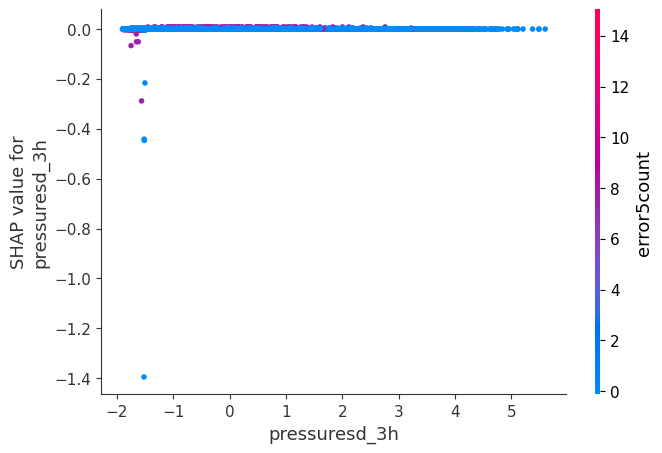

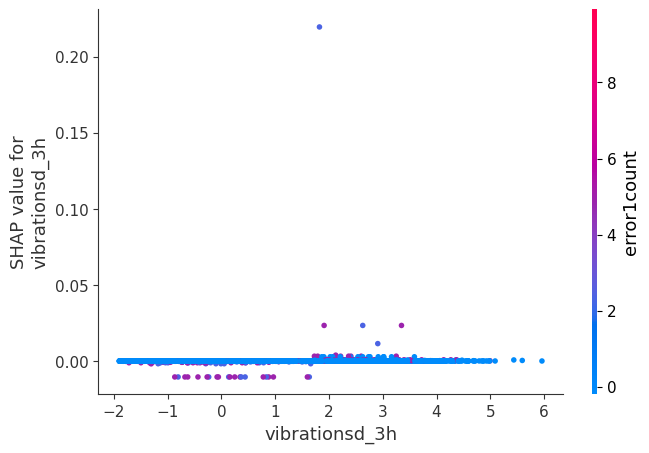

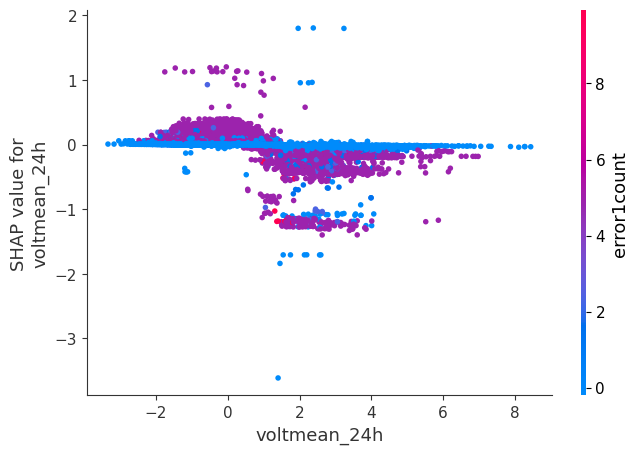

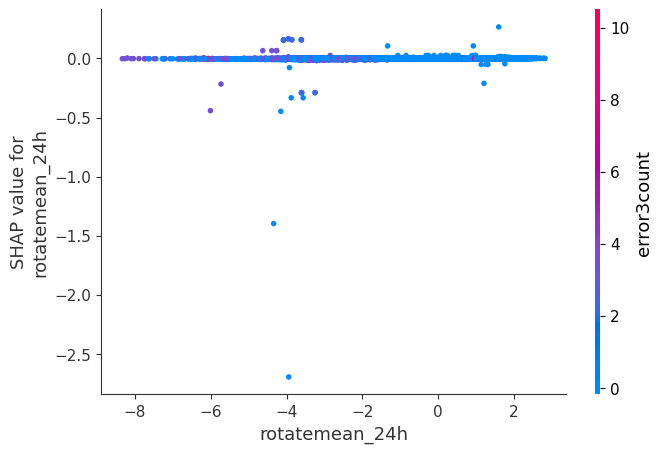

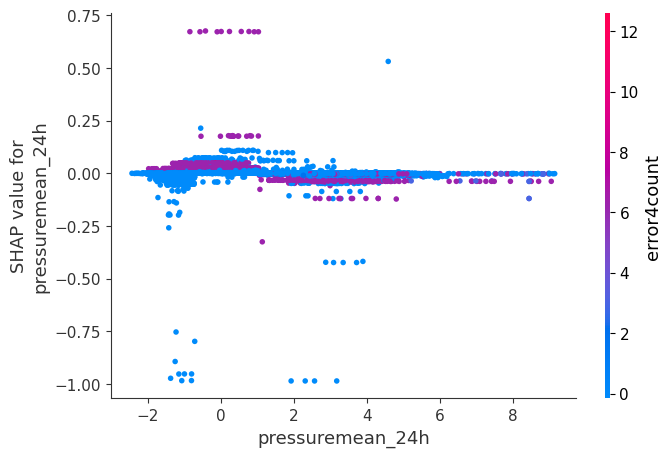

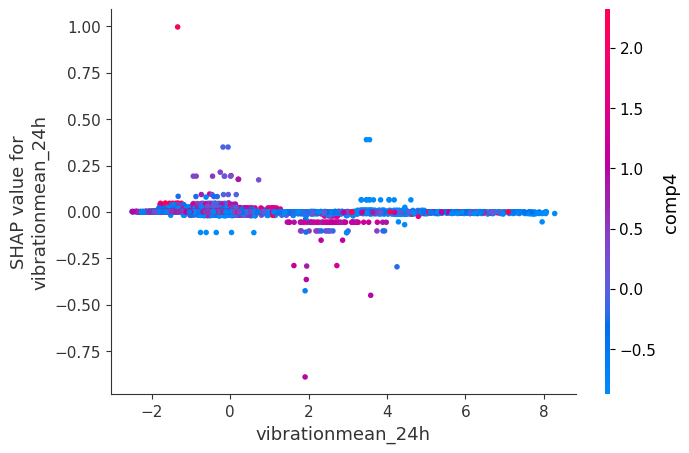

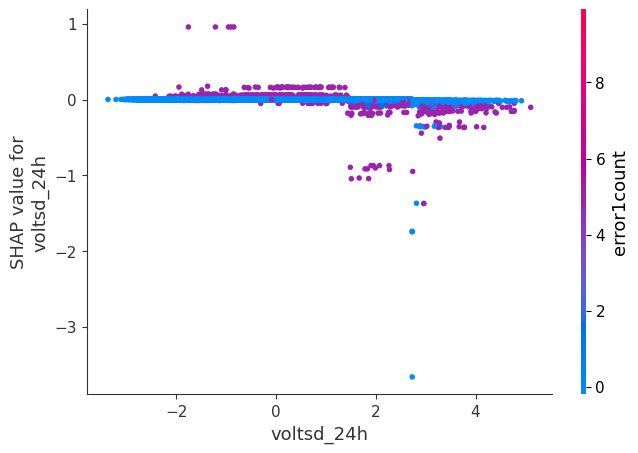

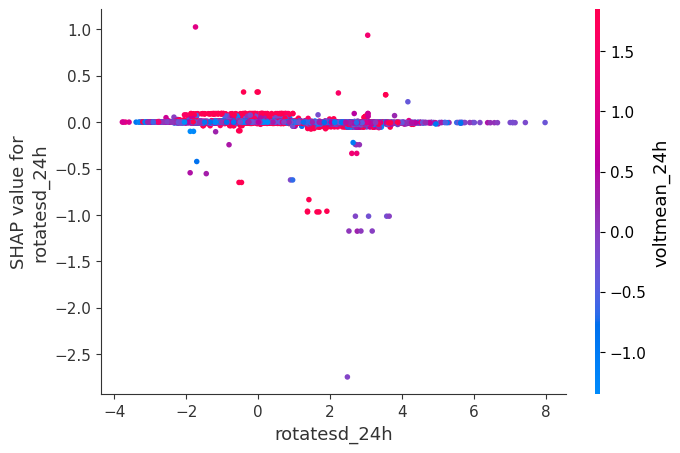

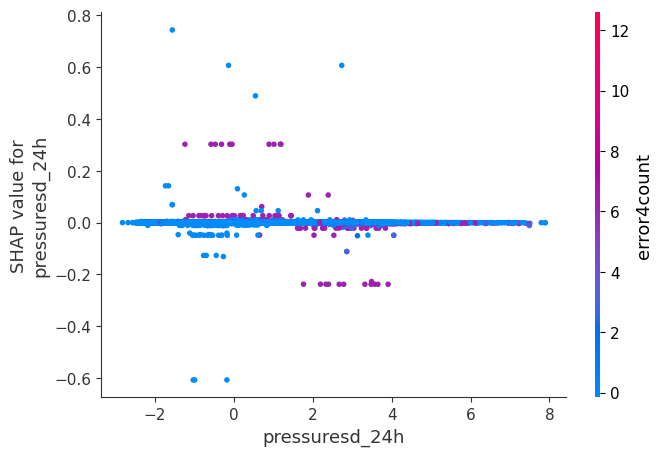

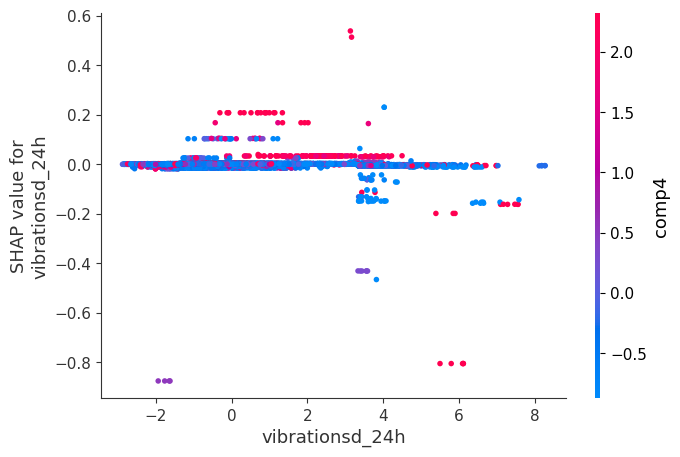

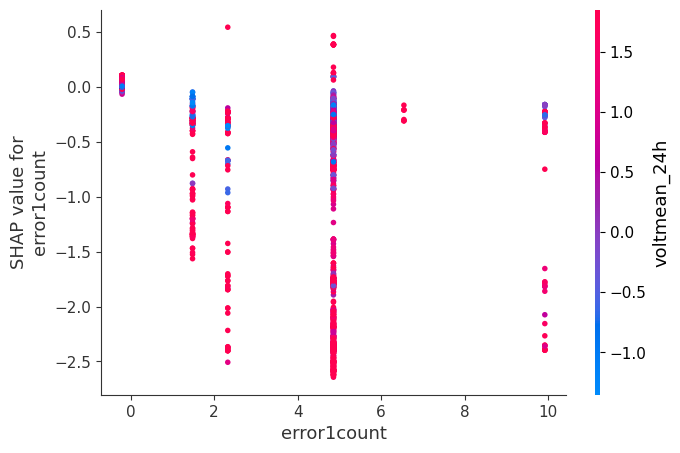

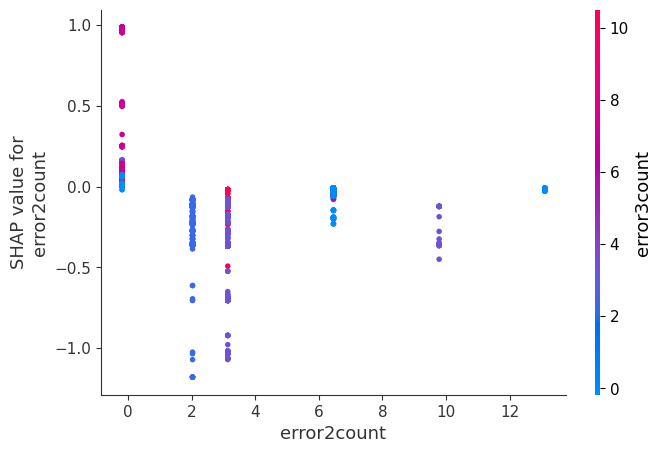

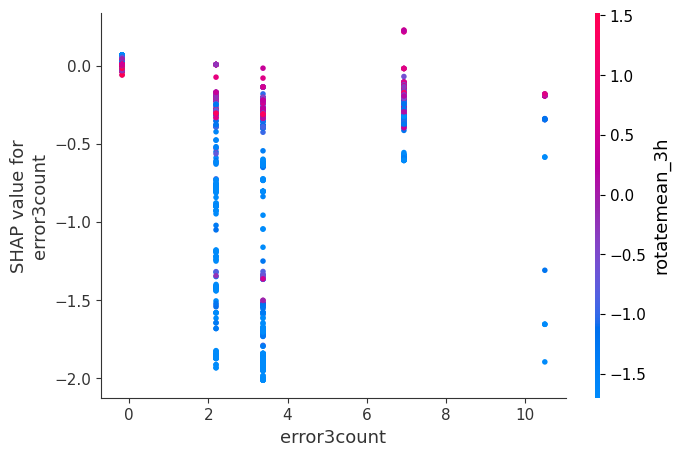

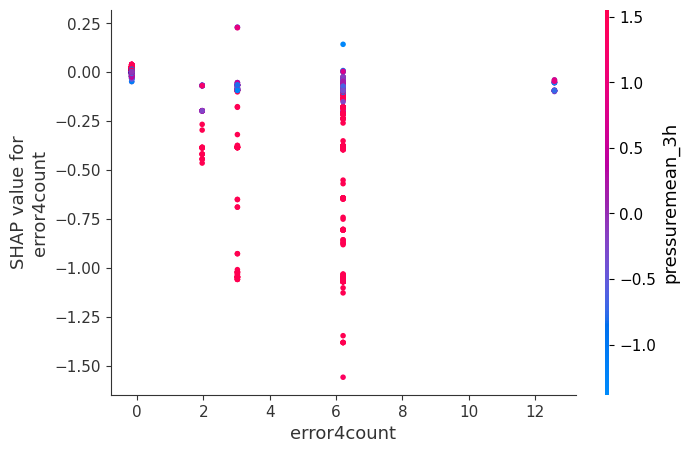

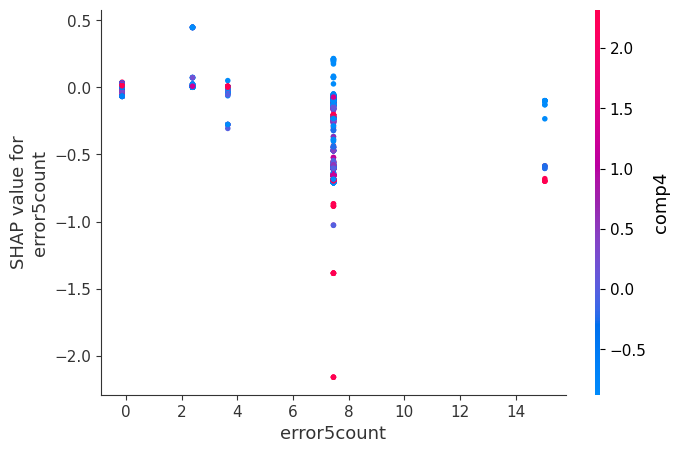

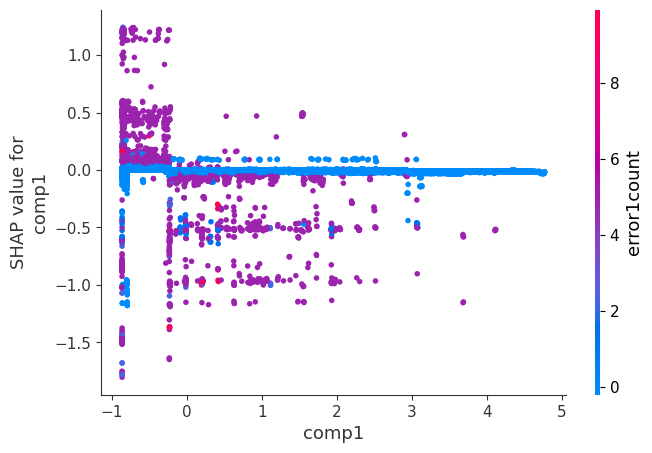

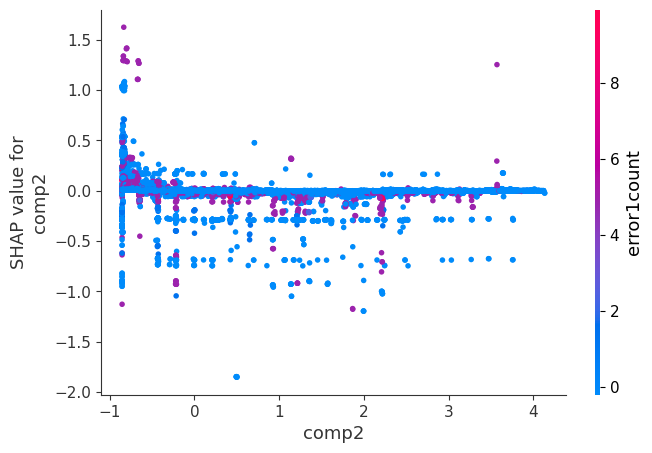

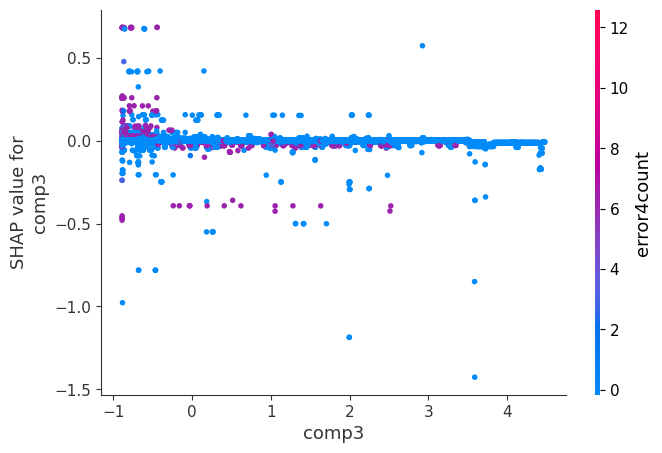

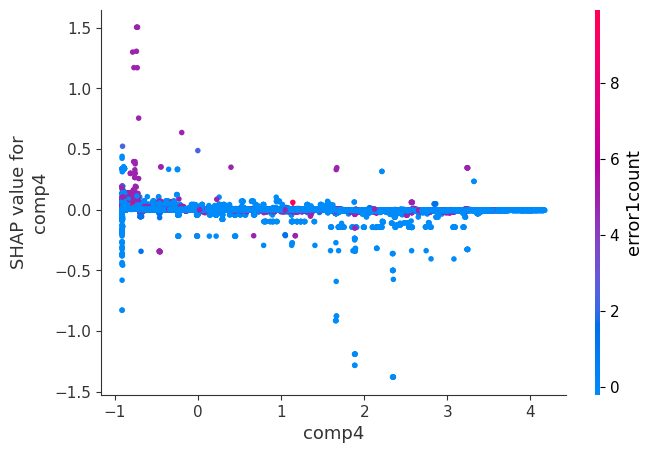

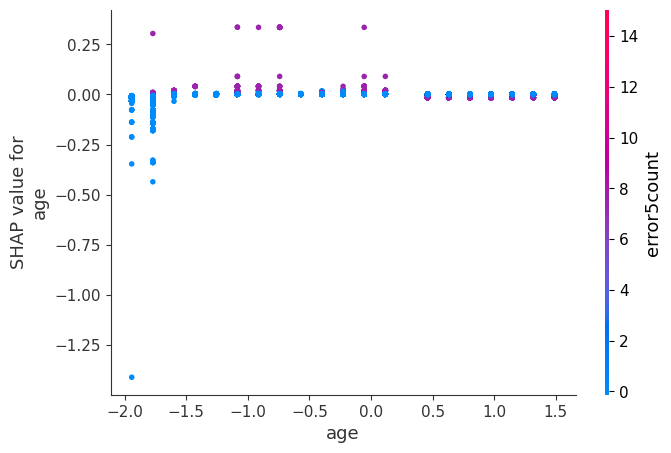

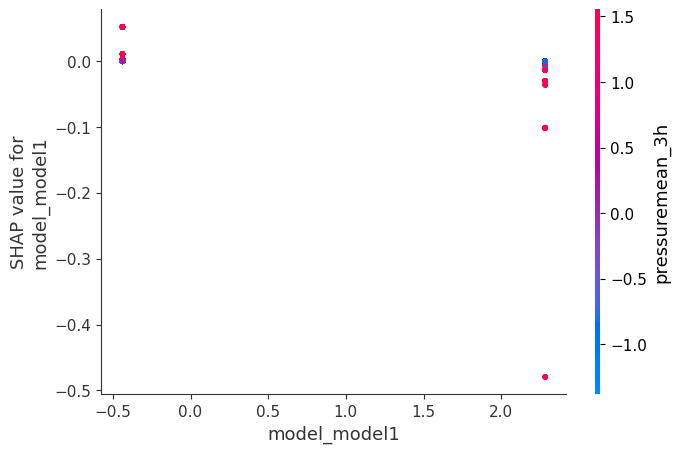

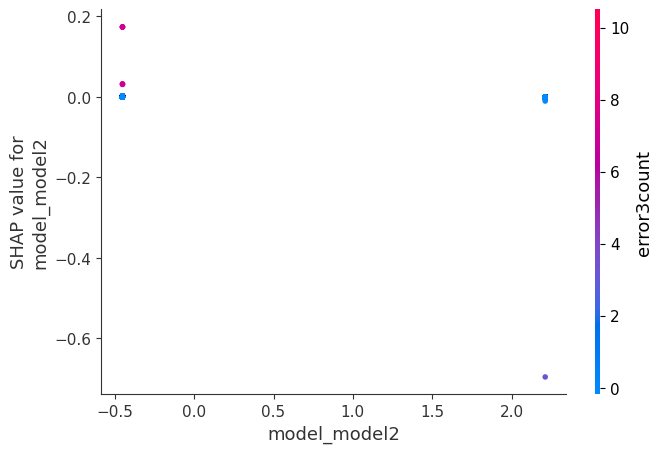

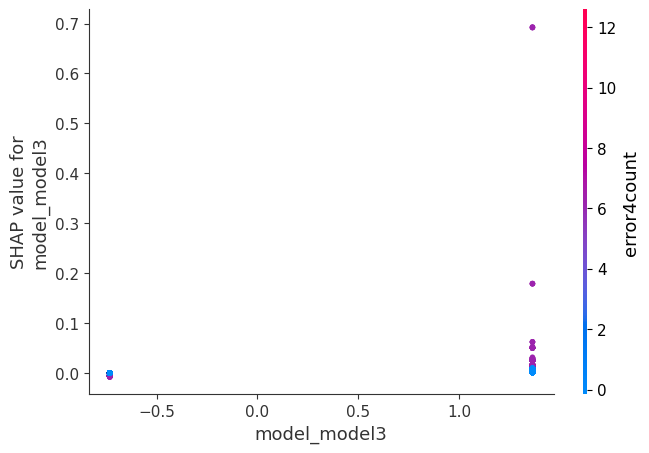

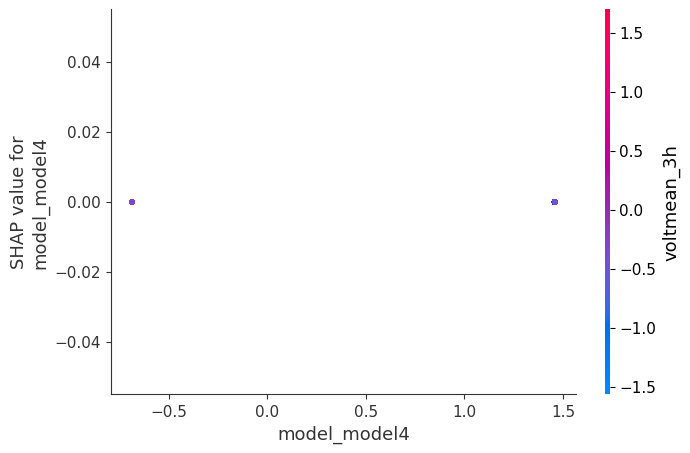

In [55]:
ai1.explain('shap')